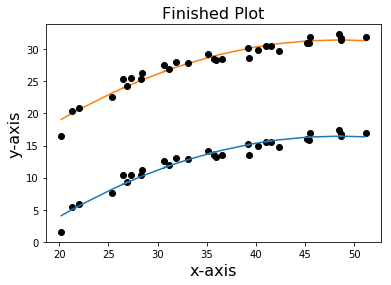

In [12]:
# setup plotting and load useful modules
# matplotlib "is a 2D plotting library which produces publication quality figures".
%matplotlib inline
import numpy
from matplotlib import pyplot
# imported numpy as np to create a shortened alias of the numpy namespace.
import numpy as np


# geometricDataReader is the function being defined.
def GeometricDataReader(File):
    # creates an empty tuple list which will hold the data.    
    xyCoord = []
    # file is the string containing name and path of the file to be opened.
    # opens the file in read mode 'r'.
    inputdata = open(File, 'r')
    # loop over each line of the file - Gets an iterator that is used to read the file, line by line.
    # the Parentheses () were used to ensure my expressions were evaluated in the correct order.
    for line in inputdata.readlines():
        # splits the line and appends to the data list    
        line = line.split()
        xyCoord.append((float(line[0]), float(line[1])))
    # used return statement to return the value of xyCoord, making it available "to other parts of the program".
    return xyCoord


GeometricDataReader('Scatter3.txt')

# extend list class
class GeomList(list):
    # specieal method implementing assignment to:
    def __setitem__ ( self ,i ,geom):
        # ensures that geom is Point2D class
        assert isinstance(geom,Point2D)
        super(). __setitem__ (i ,geom)
    def insert ( self, i ,geom):
        assert isinstance(geom,Point2D)
        super(). insert (i ,geom)
    def append ( self ,geom):
        assert isinstance(geom,Point2D)
        super(). append (geom)
    # moves the point coordinates
    def move(self, x, y):
        for point in self:
            point.move(x, y)
    # plots the points
    def plot(self):
        for point in self:
            point.plot()
        pyplot.title("Finished Plot", fontsize=16)
        # creates x-axis with fontsize
        pyplot.xlabel("x-axis", fontsize=16)
        # creates y-axis with fontsize
        pyplot.ylabel("y-axis", fontsize=16)
    # returns a copy of the GeomList
    def copy(self):
        return self
    def linearRegression(self, n):
        xList = []
        yList = []
        for point in self:
            xList.append(point.xCoord)
            yList.append(point.yCoord)
        orders = np.array(np.polyfit(xList, yList, n))
        p = np.poly1d(orders)
        pyplot.plot(xList,p(xList))
        
        
class Point2D:
    def __init__(self, data):
        self.xCoord = data[0]
        self.yCoord = data[1]
#     def show(self):
#         print(self.xCoord)
#         print(self.yCoord)
    def move(self, x, y):
        self.xCoord += x
        self.yCoord += y 
    def plot(self):
        # plots the data
        pyplot.plot(self.xCoord, self.yCoord, "o", color = "k")
    def copy(self):
        return Point2D((xCoord, yCoord))
    

g = GeometricDataReader('Scatter3.txt')
geodata = GeomList()
for data in g:
    geodata.append(Point2D(data))
# geodata[0].show()
# geodata.move(1, 2)
# geodata[0].show()
geodata.plot()
geodata.linearRegression(2)
# moves geodata to different coordinates
geodata.move(0, 15)
geodata.linearRegression (2)
geodata.plot()
pyplot.show()